<a href="https://colab.research.google.com/github/TammyEdwards/Data-Analysis-Portfolio/blob/main/Security_Report_August_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import psycopg2 as ps

In [3]:
sec= pd.read_excel("/Security Report 2023.xlsx", "Aug Raw Data")

**1.1 Loading data from Excel**

In [4]:
# Dropping columns
sec=sec.loc[:, sec.columns.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])]
sec.head()

,Regions,week 1,week 2,week 3,week 4,week 5,Insurgency,Accidents,Unrelated to insurgency,Total,Zones,Total
0,Adamawa,0,0,0,0,0,0,0,0,0,North East,0
1,Bauchi,0,0,1,0,5,0,0,1,1,North East,1
2,Borno,0,5,0,0,13,5,0,0,5,North East,5
3,Gombe,0,0,0,0,0,0,0,0,0,North East,0
4,Taraba,0,0,0,0,0,0,0,0,0,North East,0


**1.2 Cleaning Data**

In [5]:
# Renumbering
sec.index =np.arange(1, len(sec) +1)
# Adding column name
sec.index.names =['S/N']
sec.head()

,Regions,week 1,week 2,week 3,week 4,week 5,Insurgency,Accidents,Unrelated to insurgency,Total,Zones,Total
S/N,,,,,,,,,,,,
1,Adamawa,0,0,0,0,0,0,0,0,0,North East,0
2,Bauchi,0,0,1,0,5,0,0,1,1,North East,1
3,Borno,0,5,0,0,13,5,0,0,5,North East,5
4,Gombe,0,0,0,0,0,0,0,0,0,North East,0
5,Taraba,0,0,0,0,0,0,0,0,0,North East,0


**States with fatality report in August**

Arranged data in ascending order

In [6]:
# Filtering data
sec1=sec[sec.Total> 0]
sec1=sec1.sort_values(by=['Total'],ascending=False)
sec1

,Regions,week 1,week 2,week 3,week 4,week 5,Insurgency,Accidents,Unrelated to insurgency,Total,Zones,Total
S/N,,,,,,,,,,,,
19,Plateau,0,25,0,0,0,0,0,25,25,North Central,25
17,Nassarwa,0,0,0,12,0,0,12,0,12,North Central,12
18,Niger,0,0,12,0,0,12,0,0,12,North Central,12
37,Rivers,1,2,0,8,0,0,5,6,11,South South,11
24,Enugu,0,5,0,2,4,0,0,7,7,South East,7
27,Lagos,3,2,1,1,1,0,4,3,7,South West,7
3,Borno,0,5,0,0,13,5,0,0,5,North East,5
28,Ogun,0,2,3,0,4,0,4,1,5,South West,5
36,Edo,0,1,1,1,1,0,0,3,3,South South,3


Table showing only weekly data

In [7]:
# Dropping columns
sec2=sec.loc[:, sec.columns.drop(['Insurgency', 'Accidents ', 'Unrelated to insurgency','Total ', 'Zones '])]
sec2=sec2.sort_values(by=['Total'],ascending=False)
sec2.head()

,Regions,week 1,week 2,week 3,week 4,week 5,Total
S/N,,,,,,,
19,Plateau,0,25,0,0,0,25
17,Nassarwa,0,0,0,12,0,12
18,Niger,0,0,12,0,0,12
37,Rivers,1,2,0,8,0,11
27,Lagos,3,2,1,1,1,7


Table showing causes of death data

In [8]:
# Dropping columns
sec3=sec.loc[:, sec.columns.drop(['Total ', 'week 1', 'week 2','week 3', 'week 4','Zones ' ])]
sec3=sec3.sort_values(by=['Total'],ascending=False)
sec3.head()

,Regions,week 5,Insurgency,Accidents,Unrelated to insurgency,Total
S/N,,,,,,
19,Plateau,0,0,0,25,25
17,Nassarwa,0,0,12,0,12
18,Niger,0,12,0,0,12
37,Rivers,0,0,5,6,11
27,Lagos,1,0,4,3,7


In [9]:
# Dropping columns
sec3a=sec.loc[:, sec.columns.drop(['Total ', 'week 1', 'week 2','week 3', 'week 4', 'Total'])]
sec3a.head()

,Regions,week 5,Insurgency,Accidents,Unrelated to insurgency,Zones
S/N,,,,,,
1,Adamawa,0,0,0,0,North East
2,Bauchi,5,0,0,1,North East
3,Borno,13,5,0,0,North East
4,Gombe,0,0,0,0,North East
5,Taraba,0,0,0,0,North East


In [10]:
#Rearranging data
sec4= pd.melt(sec1, id_vars=['Regions ', 'Total', 'Zones '], value_vars=['Insurgency', 'Accidents ', 'Unrelated to insurgency'])
sec4.head()

,Regions,Total,Zones,variable,value
0,Plateau,25,North Central,Insurgency,0
1,Nassarwa,12,North Central,Insurgency,0
2,Niger,12,North Central,Insurgency,12
3,Rivers,11,South South,Insurgency,0
4,Enugu,7,South East,Insurgency,0


In [11]:
#Rearranging data
sec5=pd.melt(sec, id_vars=['Zones ', 'Total'], value_vars=[ 'week 1', 'week 2','week 3', 'week 4'])
sec5.head()

,Zones,Total,variable,value
0,North East,0,week 1,0
1,North East,1,week 1,0
2,North East,5,week 1,0
3,North East,0,week 1,0
4,North East,0,week 1,0


In [41]:
sec6= sec1.groupby('Zones ').sum()
sec6

<ipython-input-41-b754621811aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sec6= sec1.groupby('Zones ').sum()


,week 1,week 2,week 3,week 4,week 5,Insurgency,Accidents,Unrelated to insurgency,Total,Total
Zones,,,,,,,,,,
North Central,0,25,12,13,0,12,12,26,50,50
North East,0,5,1,0,18,5,0,1,6,6
North West,0,0,0,1,9,0,0,1,1,1
South East,0,5,0,2,4,0,0,7,7,7
South South,1,3,1,9,1,0,5,9,14,14
South West,5,7,4,1,11,0,10,7,17,17


**1.3 Data Interpretation and Visualization**

**i.Regional analysis**

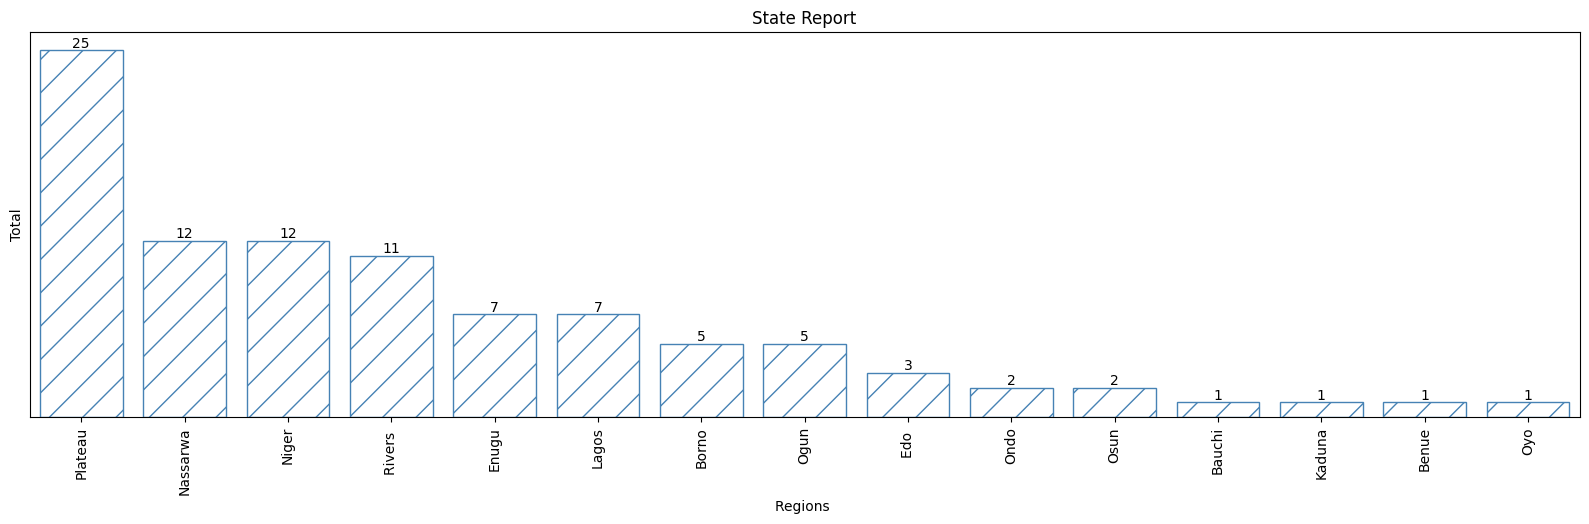

In [12]:
# Plotting a bar chart
plt.figure(figsize=(20,5))
ax = sns.barplot(x='Regions ', y=  'Total' , data=sec1, fill=False, edgecolor='steelblue', hatch='/')
for i in ax.containers:
  ax.bar_label(i,)
plt.xticks(rotation = 90)
plt.yticks([])
sns.set_style('ticks')
plt.title('State Report')
plt.show()

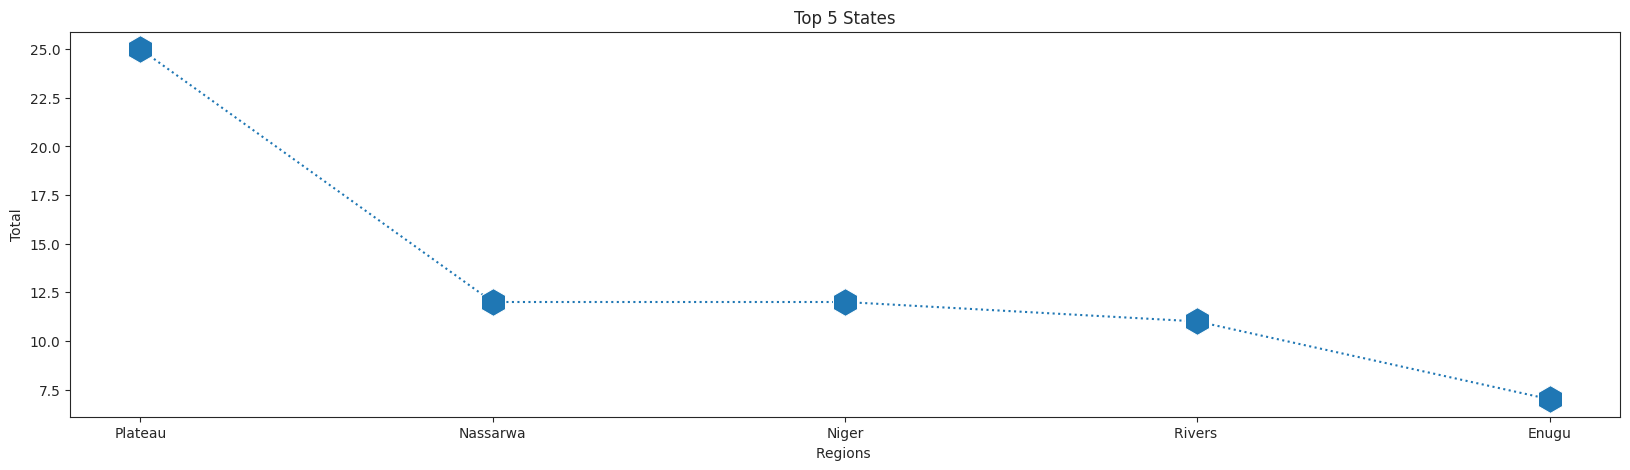

In [13]:
# Plotting a bar chart
plt.figure(figsize=(20,5))
ax=sns.lineplot(x='Regions ', y=  'Total' , data=sec1.head(), linestyle='dotted', marker='h', markersize=20)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 5 States')
sns.set_style('ticks')
plt.show()

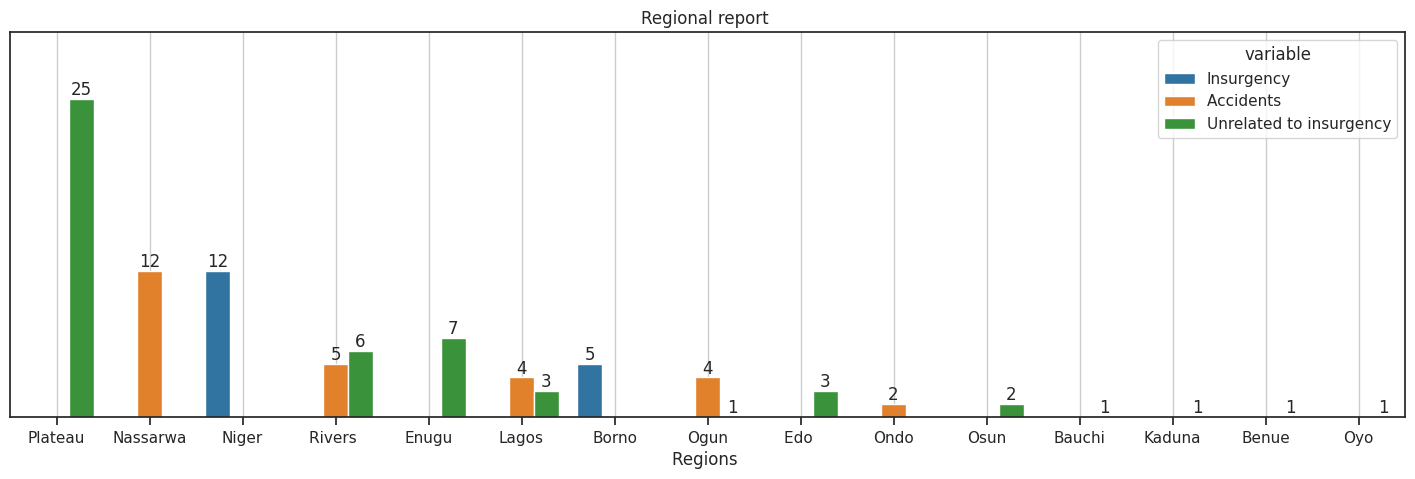

In [31]:
ax= sns.barplot(x='Regions ', y ='value' ,  data=sec4, hue='variable', errorbar=None)
sns.set(rc={'figure.figsize':(18,5)})
for i in ax.containers:
  ax.bar_label(i,)
  ax.set_ylim(1, 30)
plt.grid()
plt.title('Regional report ')
sns.set_palette('tab10')
sns.set_style('ticks')
plt.yticks([])
plt.ylabel('')
plt.show()

**ii. Zonal analysis**

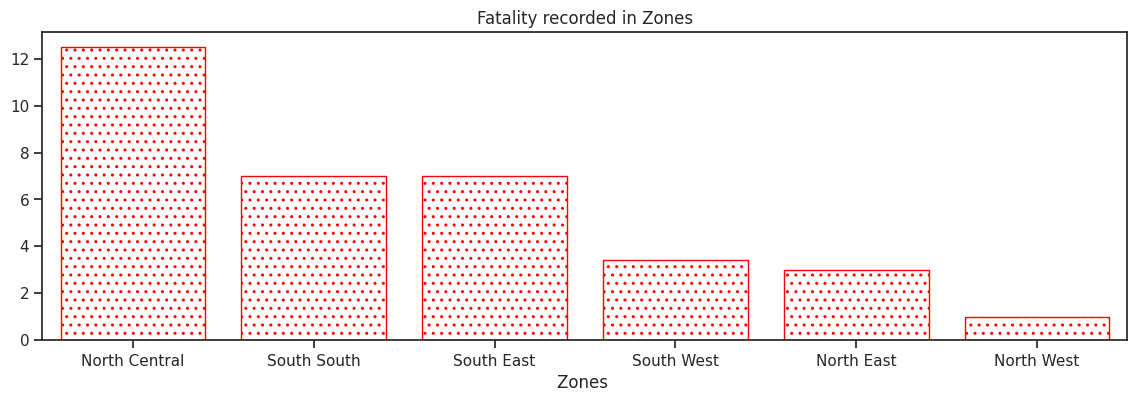

In [64]:
# Plotting a box chart
plt.figure(figsize=(14,4))
sns.barplot(x='Zones ', y= 'Total' , data=sec1, errorbar=None, fill=False, edgecolor='red', hatch='..')
plt.title('Fatality recorded in Zones')
plt.ylabel('')
plt.show()

<Axes: ylabel='Zones '>

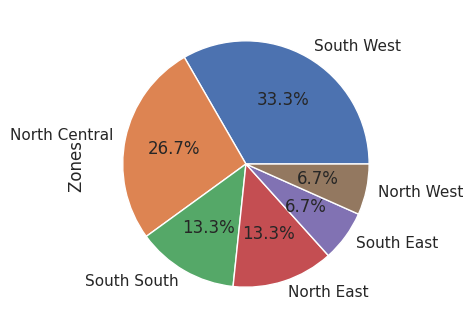

In [56]:
sec1['Zones '].value_counts().plot(kind='pie', figsize=(7,4), autopct='%0.1f%%')

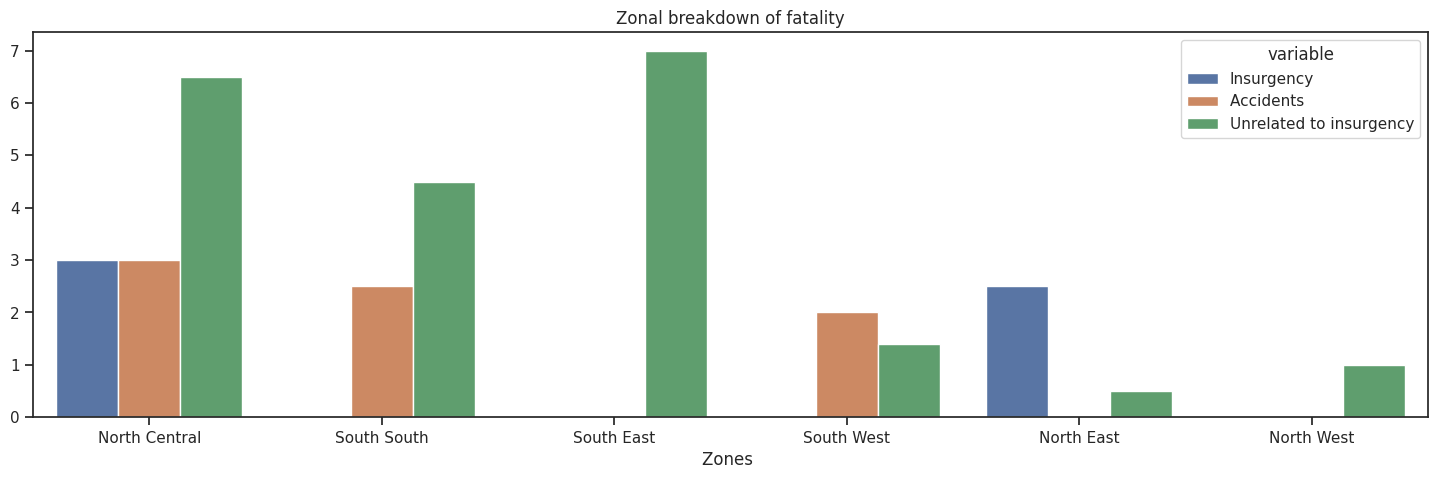

In [74]:
# Plotting a bar chart for all causes of fatality
sns.barplot(x='Zones ',y ='value' , data=sec4, hue='variable', errorbar=None)
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('ticks')
plt.xticks(rotation = 0)
plt.title('Zonal breakdown of fatality')
plt.ylabel('')
plt.show()

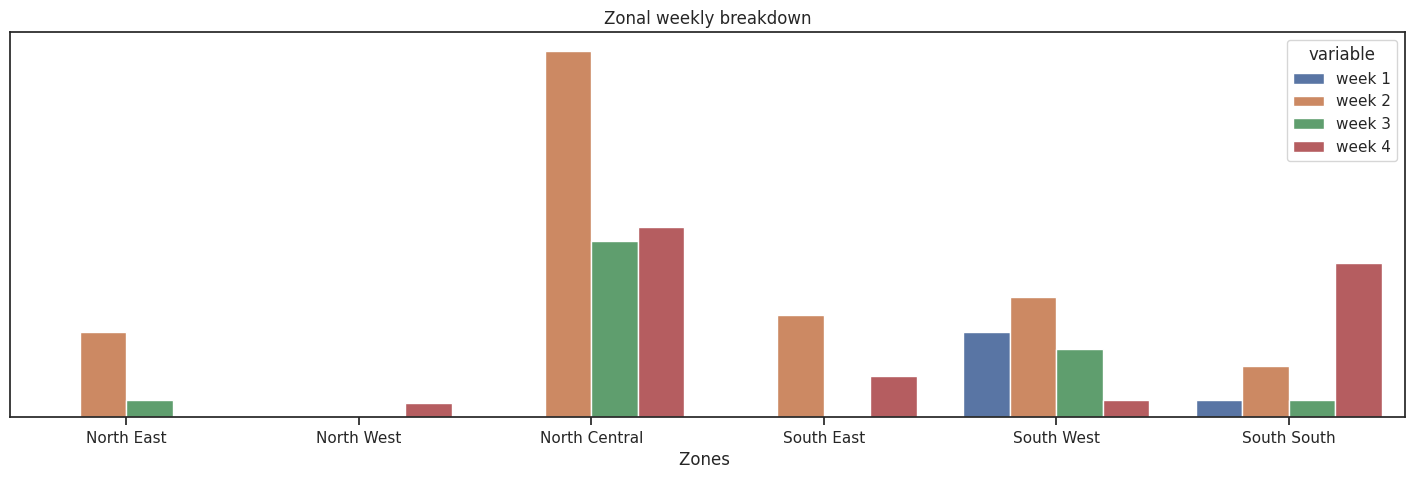

In [75]:
sns.barplot(x='Zones ', y ='value' , data=sec5, hue='variable', errorbar=None)
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('ticks')
sns.dark_palette('violet')
plt.title('Zonal weekly breakdown')
plt.yticks([])
plt.ylabel('')
plt.show()

**iii. Analysis based on cause of death**


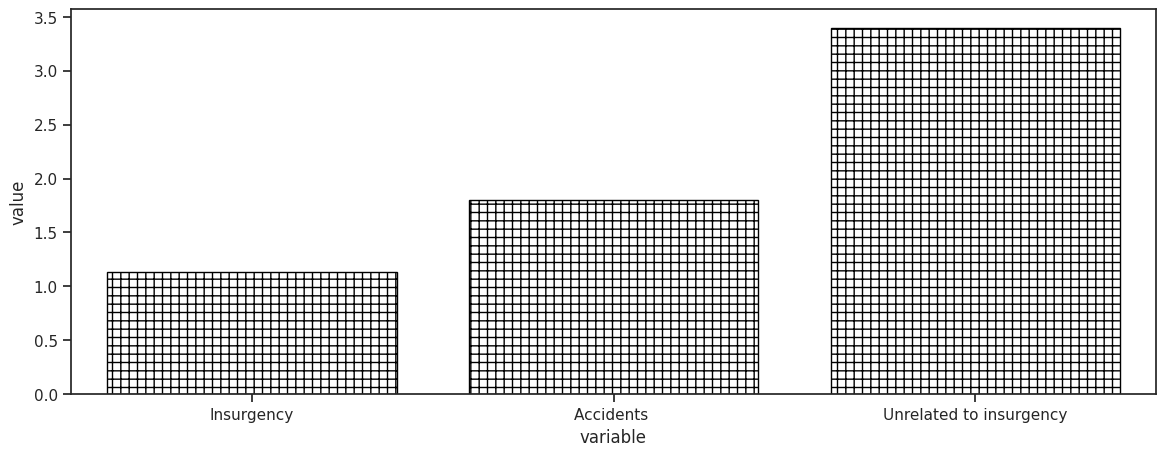

In [81]:
sns.barplot(x='variable',y ='value', data=sec4, errorbar=None,  fill=False, edgecolor='black', hatch='++')
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('ticks')
plt.show()

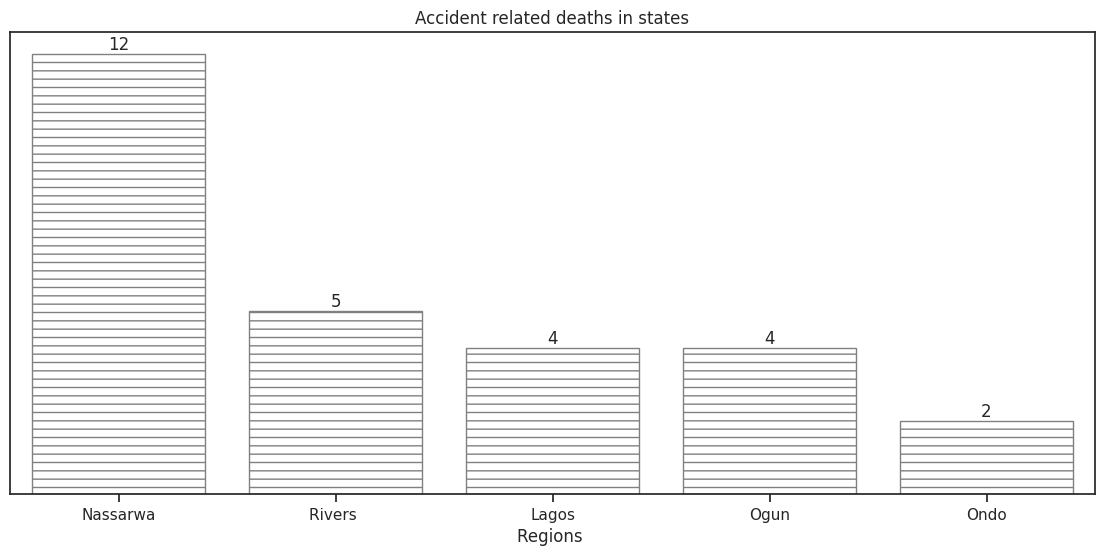

In [85]:
plt.figure(figsize=(14,6))
sec3b=sec3[sec3['Accidents ']!=0]
ax= sns.barplot(x= 'Regions ', y='Accidents ', data=sec3b,  fill=False, edgecolor='gray', hatch='--')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Accident related deaths in states')
plt.yticks([])
plt.ylabel('')
plt.show()


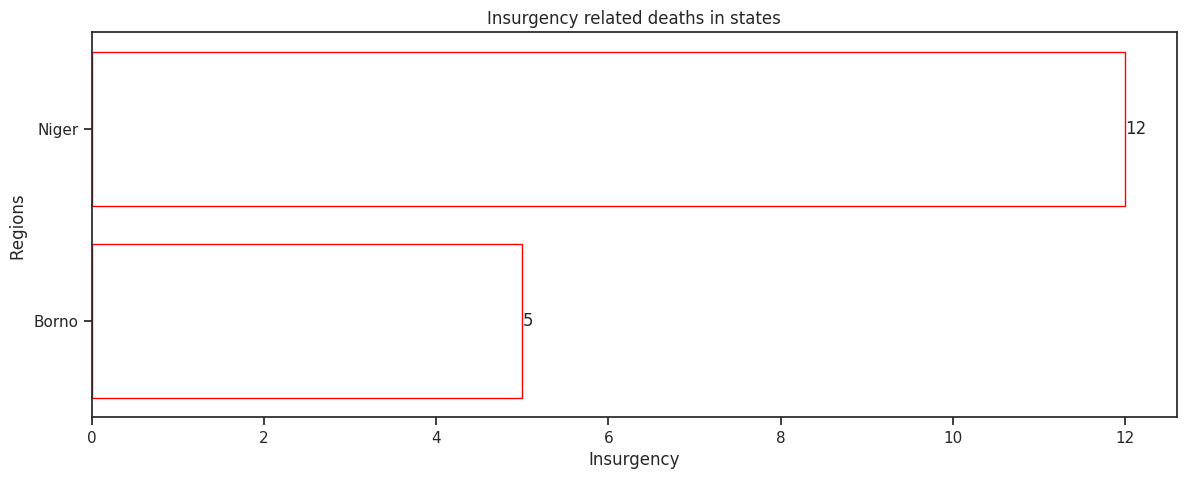

In [84]:
# Plotting a bar chart
plt.figure(figsize=(14,5))
sec3c=sec3[sec3['Insurgency']!=0]
ax=sns.barplot(x= 'Insurgency', y= 'Regions ', data=sec3c,  fill=False, edgecolor='red', hatch='__')
for i in ax.containers:
 ax.bar_label(i,)
plt.title('Insurgency related deaths in states')
sns.set_palette('tab10')
plt.show()